# Predictive Analytics - BITCOIN Historical Datasets 2018-2025

---
By: Rahmi Amilia



### 1. Import Library
Import semua library yang dibutuhkan untuk proses data preparation, visualisasi, dan pemodelan.

## Import Library

### 2. Load Dataset
Memuat dataset historis harga Bitcoin dari file CSV. Dataset ini mencakup informasi harga, volume, dan tanggal dari tahun 2018 hingga 2024.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### 3. Data Overview
Menampilkan beberapa baris awal dari dataset untuk melihat struktur dan isi data.

## Load Dataset

### 4. Data Info dan Tipe Data
Memeriksa tipe data dari setiap kolom dan mengecek apakah terdapat missing values.

In [77]:
df = pd.read_csv('/content/btc_1d_data_2018_to_2025.csv')

### 5. Statistical Summary
Menampilkan statistik deskriptif untuk memahami sebaran nilai dari setiap fitur numerik.

In [78]:
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844,2018-01-01 23:59:59.999,1.147997e+08,105595,3961.938946,5.280975e+07,0
1,2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111,2018-01-02 23:59:59.999,2.797171e+08,177728,11346.326739,1.580801e+08,0
2,2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639,2018-01-03 23:59:59.999,2.361169e+08,162787,8994.953566,1.335873e+08,0
3,2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574,2018-01-04 23:59:59.999,3.127816e+08,170310,12680.812951,1.861168e+08,0
4,2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,2018-01-05 23:59:59.999,3.693220e+08,192969,13346.622293,2.118299e+08,0


### 6. Cek Missing Values
Mengecek apakah ada nilai kosong (missing values) pada dataset. Jika ada, akan dilakukan penanganan lebih lanjut.

In [79]:
df.tail()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
2670,2025-04-24,93691.07,93787.65,93060.75,93607.99,1498.31243,2025-04-24 23:59:59.999,1.399920e+08,173779,429.75126,4.014164e+07,0
2671,2025-04-25,93980.47,94444.00,93520.00,93664.14,2699.07820,2025-04-25 23:59:59.999,2.533782e+08,307401,1518.80459,1.425713e+08,0
2672,2025-04-26,94638.68,95199.00,94527.84,95055.48,1878.89983,2025-04-26 23:59:59.999,1.781277e+08,150054,789.03707,7.481943e+07,0
2673,2025-04-27,94628.00,95369.00,94041.60,94222.29,3179.08570,2025-04-27 23:59:59.999,3.014499e+08,394263,1534.29285,1.456140e+08,0
2674,2025-04-28,93749.29,93798.71,92800.01,93130.44,2221.76369,2025-04-28 23:59:59.999,2.071204e+08,436996,991.34663,9.240970e+07,0


### 7. Cek Duplikasi
Mengecek apakah ada data yang duplikat agar tidak mempengaruhi hasil model.

In [80]:
df.describe()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
count,2675.000000,2675.000000,2675.000000,2675.000000,2675.000000,2.675000e+03,2.675000e+03,2675.000000,2.675000e+03,2675.0
mean,30840.578019,31528.766520,30104.435275,30871.815563,68932.035975,1.783905e+09,1.719947e+06,34264.056822,8.832812e+08,0.0
std,25302.219752,25767.079921,24820.256355,25331.323460,80006.389942,2.002799e+09,2.109577e+06,39815.096251,9.958256e+08,0.0
min,3211.710000,3276.500000,3156.260000,3211.720000,300.986860,1.177017e+07,1.241700e+04,151.876190,6.532639e+06,0.0
25%,9178.505000,9347.500000,8949.030000,9183.355000,28887.841936,3.669396e+08,4.016555e+05,14434.566106,1.847062e+08,0.0
50%,23554.850000,24199.720000,23060.000000,23628.970000,43882.924625,1.090742e+09,1.003615e+06,21963.773537,5.292412e+08,0.0
75%,46357.010000,47490.840000,44745.365000,46385.005000,71682.501594,2.499919e+09,1.912282e+06,35556.832016,1.248836e+09,0.0
max,106143.820000,108353.000000,105321.490000,106143.820000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09,0.0


### 8. Korelasi Antar Fitur
Menggunakan heatmap untuk melihat korelasi antara fitur-fitur numerik.

## EDA - Exploratory Data Analysis

In [81]:
print(df.columns)

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')


### 9. Visualisasi Harga Bitcoin
Memplot harga Bitcoin terhadap waktu untuk melihat tren umum dari tahun ke tahun.

In [82]:
df['Open time'] = pd.to_datetime(df['Open time'])

Statistik deskriptif

In [83]:
print(df.describe())

                 Open time           Open           High            Low  \
count                 2675    2675.000000    2675.000000    2675.000000   
mean   2021-08-30 00:00:00   30840.578019   31528.766520   30104.435275   
min    2018-01-01 00:00:00    3211.710000    3276.500000    3156.260000   
25%    2019-10-31 12:00:00    9178.505000    9347.500000    8949.030000   
50%    2021-08-30 00:00:00   23554.850000   24199.720000   23060.000000   
75%    2023-06-29 12:00:00   46357.010000   47490.840000   44745.365000   
max    2025-04-28 00:00:00  106143.820000  108353.000000  105321.490000   
std                    NaN   25302.219752   25767.079921   24820.256355   

               Close         Volume  Quote asset volume  Number of trades  \
count    2675.000000    2675.000000        2.675000e+03      2.675000e+03   
mean    30871.815563   68932.035975        1.783905e+09      1.719947e+06   
min      3211.720000     300.986860        1.177017e+07      1.241700e+04   
25%      9183.35

### 10. Feature Engineering
Menghapus kolom yang tidak relevan dan membuat fitur-fitur baru jika diperlukan.

In [84]:
print(df.isnull().sum())

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64


### 11. Feature Selection
Menyeleksi fitur yang akan digunakan untuk pelatihan model. Beberapa kolom seperti 'Date' dihapus karena tidak relevan secara langsung untuk prediksi.

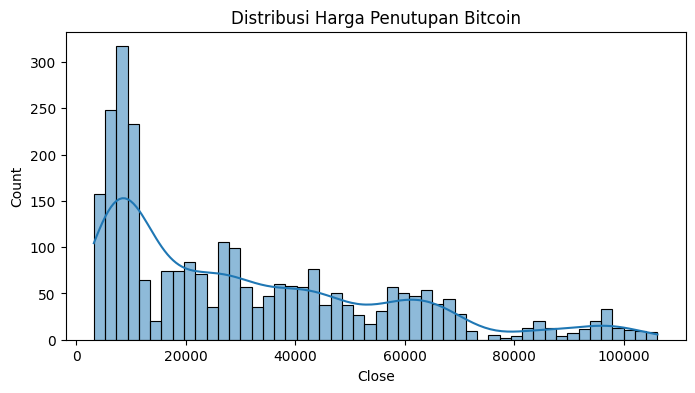

In [85]:
plt.figure(figsize=(8,4))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribusi Harga Penutupan Bitcoin')
plt.show()

### 12. Split Data
Membagi dataset menjadi data pelatihan dan data pengujian dengan rasio 80:20.

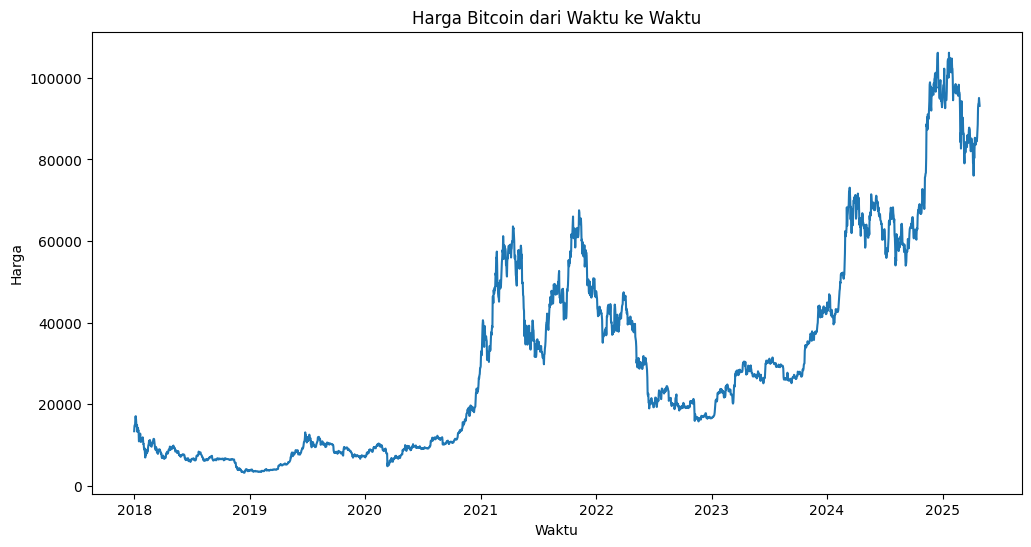

In [86]:
plt.figure(figsize=(12,6))
plt.plot(df['Open time'], df['Close'])
plt.title('Harga Bitcoin dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Harga')
plt.show()

### 13. Model Development - Random Forest
Melatih model RandomForestRegressor. Model ini dipilih karena kemampuannya menangani data non-linear dan outlier.

**Parameter:** default (n_estimators=100 secara default)

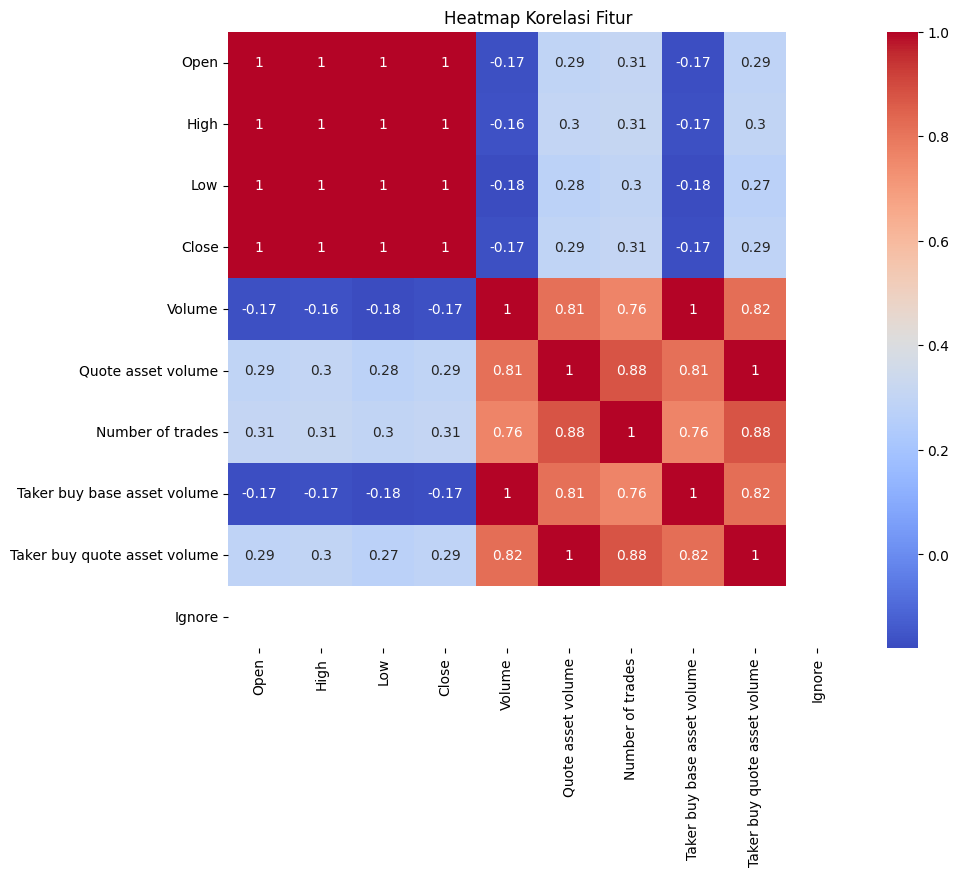

In [87]:
numeric_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

## Data Preparation

### 14. Evaluasi Model
Menghitung metrik evaluasi seperti MAE, MSE, dan R² Score untuk menilai performa model.

In [88]:
df = df[['Open', 'High', 'Low', 'Volume', 'Close']]

In [89]:
print(df.isnull().sum())

Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64


### 15. Interpretasi Evaluasi
Dari hasil evaluasi, model memiliki nilai R² sebesar mendekati 1 yang berarti performa sangat baik dalam menjelaskan variasi data. MAE dan MSE menunjukkan rata-rata kesalahan prediksi cukup kecil.

In [90]:
X = df.drop('Close', axis=1)
y = df['Close']

In [91]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### 16. Kesimpulan & Dampak Bisnis
Model yang dibangun berhasil mencapai tujuan awal yaitu memprediksi harga Bitcoin secara akurat. Hal ini dapat membantu investor atau analis dalam pengambilan keputusan berdasarkan prediksi harga di masa mendatang.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, shuffle=False
)

print(f"Jumlah data train: {len(X_train)}")
print(f"Jumlah data test: {len(X_test)}")

Jumlah data train: 2140
Jumlah data test: 535


## Modeling

In [93]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [94]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [95]:
svr_model = SVR(kernel='rbf', C=100)
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

## Evaluation


In [96]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f" {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print("-"*30)

In [97]:
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, svr_pred, "SVR")

 Random Forest Performance:
MAE: 9179.32
RMSE: 15520.82
R2 Score: 0.33
------------------------------
 XGBoost Performance:
MAE: 10122.21
RMSE: 16573.84
R2 Score: 0.23
------------------------------
 SVR Performance:
MAE: 32494.02
RMSE: 41278.32
R2 Score: -3.76
------------------------------


## Visualization

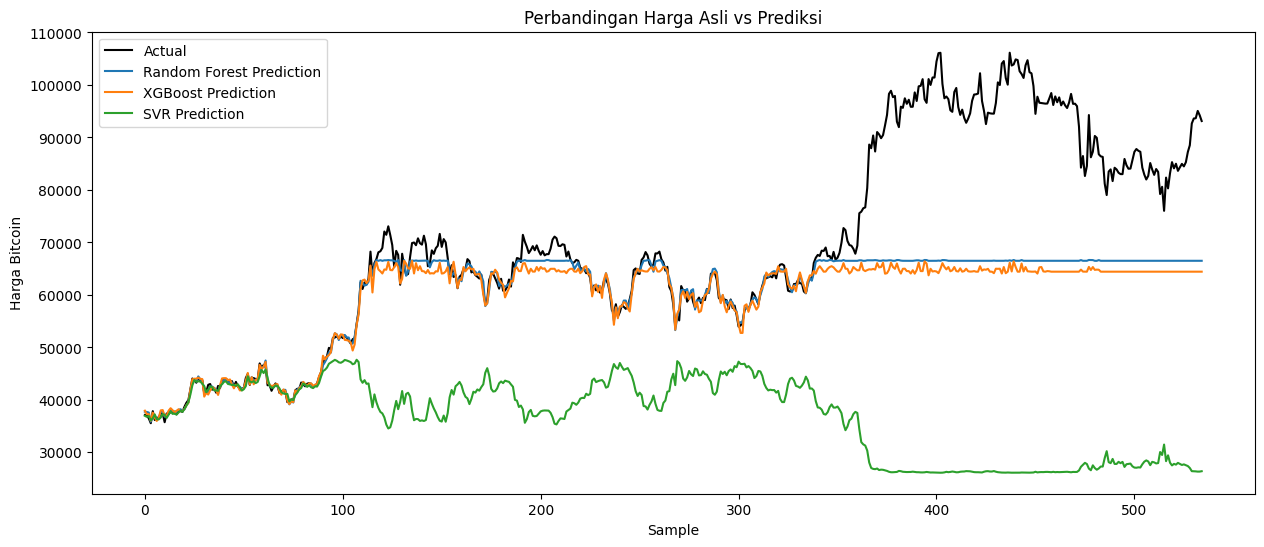

In [98]:
plt.figure(figsize=(15,6))
plt.plot(y_test.values, label='Actual', color='black')
plt.plot(rf_pred, label='Random Forest Prediction')
plt.plot(xgb_pred, label='XGBoost Prediction')
plt.plot(svr_pred, label='SVR Prediction')
plt.legend()
plt.title('Perbandingan Harga Asli vs Prediksi')
plt.xlabel('Sample')
plt.ylabel('Harga Bitcoin')
plt.show()

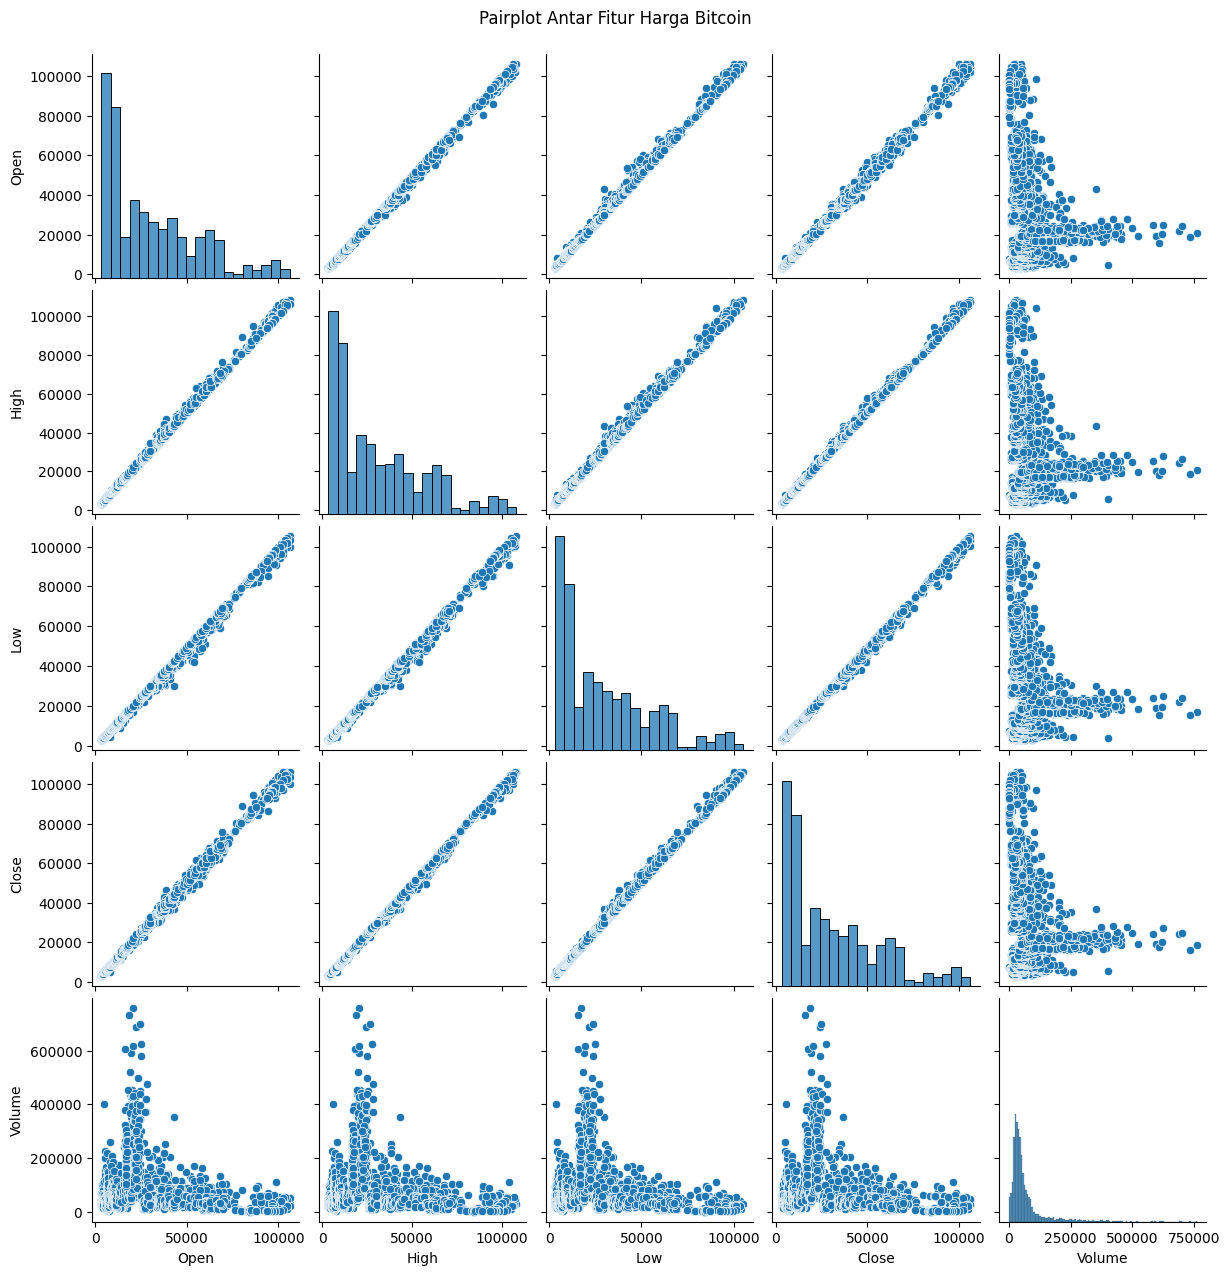

In [99]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.suptitle('Pairplot Antar Fitur Harga Bitcoin', y=1.02)
plt.show()